# Visualise forward Euler and Verlet integrators for Lennart Jones potential

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from dynamical_system import *
from time_integrator import *

## Lennart Jones potential

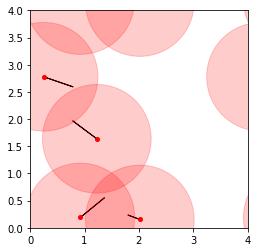

In [2]:
np.random.seed(2513517)
# Mass of particles
mass = 1.0
# Size of simulation box
boxsize = 4.0
# Number of particles
npart = 4
# kinetic energy scale
epsilon_kin=0.1
dt = 0.1
T_final = 16.0
dynamical_system = LennartJonesSystem(mass,npart,boxsize,epsilon_kin=epsilon_kin)
dim = dynamical_system.dim
forward_euler_integrator = ForwardEulerIntegrator(dynamical_system,dt)
verlet_integrator = VerletIntegrator(dynamical_system,dt)
x = np.zeros(dim)
v = np.zeros(dim)
dynamical_system.set_random_state(x,v)
dynamical_system.visualise_configuration(x,v)

### Trajectories

In [ ]:
n_step = int(T_final/dt)
energies = np.zeros((2,n_step))

for j, integrator in enumerate((forward_euler_integrator,verlet_integrator)):
    integrator.set_state(x,v)
    for k in range(n_step):
        energies[j,k] = dynamical_system.energy(integrator.x,integrator.v)
        integrator.integrate(1)
        filename = './output/lennart_jones_'+integrator.label+'_'+('%04d' % k)+'.jpg'
        dynamical_system.visualise_configuration(integrator.x,integrator.v,filename=filename)

### Energy drift

In [ ]:
plt.clf()
figs, axs = plt.subplots(2,1)
X = dt*np.arange(n_step)
axs[0].plot(X,energies[0,:]-energies[0,0],linewidth=2,color='blue')
axs[0].set_ylabel('energy drift $E(t)-E(0)$')
axs[0].set_title('forward Euler')
axs[1].plot(X,energies[1,:]-energies[1,0],linewidth=2,color='red')
axs[1].set_title('Verlet')
axs[1].set_xlabel('time $t$')
axs[1].set_ylabel('energy drift $E(t)-E(0)$')
plt.savefig('energies.pdf',bbox_inches='tight')